## Imports: libraries and dataset

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import itertools

Load the dataset

In [3]:
# Load the dataset
data = pd.read_csv('../../dataset/KAG_energydata_complete.csv', index_col='date', parse_dates=True)

## Dataset Preprocessing

Define split ratio and index

In [4]:
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

Split the data

In [5]:
train_data = data[:split_index]
test_data = data[split_index:]

print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (15788, 28)
Test data shape: (3947, 28)


Choose feature to predict

In [6]:
column_name = 'Appliances'
train_series = train_data[column_name]
test_series = test_data[column_name]

## Model creation and training

In [7]:
# Define the possible values for trend and seasonal components
trend_options = ['add', 'mul', None]
seasonal_options = ['add', 'mul', None]
seasonal_periods = 7

# Create all combinations of trend and seasonality
combinations = list(itertools.product(trend_options, seasonal_options))

In [8]:
best_model = None
best_aic = float('inf')
best_params = None

In [9]:
for trend, seasonal in combinations:
    if trend is None and seasonal is None:
        continue  # Skip the combination where both trend and seasonal are None

    try:
        model = sm.tsa.ExponentialSmoothing(train_series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        model_fit = model.fit()
        aic = model_fit.aic

        print(f"Trend: {trend}, Seasonal: {seasonal}, AIC: {aic}")

        if aic < best_aic:
            best_aic = aic
            best_model = model_fit
            best_params = (trend, seasonal)

    except Exception as e:
        print(f"Trend: {trend}, Seasonal: {seasonal} - Model failed with error: {e}")

print(f"Best Model: Trend: {best_params[0]}, Seasonal: {best_params[1]}, AIC: {best_aic}")

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Trend: add, Seasonal: add, AIC: 136460.50884413192


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Trend: add, Seasonal: mul, AIC: 136400.16506451092


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Trend: add, Seasonal: None, AIC: 135545.9304220026


/home/stas/.local/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:612: RuntimeWarning: overflow encountered in divide
  J_transposed[i] = df / dx
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Trend: mul, Seasonal: add, AIC: 10908578.440262415


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/home/stas/.local/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:1409: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Trend: mul, Seasonal: mul, AIC: inf


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Trend: mul, Seasonal: None, AIC: 136467.9200149183
Trend: None, Seasonal: add, AIC: 135810.42108404753


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


Trend: None, Seasonal: mul, AIC: 194154.97717346586
Best Model: Trend: add, Seasonal: None, AIC: 135545.9304220026


/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Define Model

In [10]:
predictions = []
actuals = []
batch_size = 100

Forecast data

In [11]:
for i in range(0, len(test_series), batch_size):
    end_index = i + batch_size if i + batch_size < len(test_series) else len(test_series)
    train_window = np.concatenate([train_series, test_series[:i]])
    
    try:
        # Fit the ETS model
        model = sm.tsa.ExponentialSmoothing(train_window, trend=best_params[0], seasonal=best_params[1], seasonal_periods=seasonal_periods)
        model_fit = model.fit()
        
        # Forecast
        forecast = model_fit.forecast(steps=end_index - i)
        predictions.extend(forecast)
        actuals.extend(test_series[i:end_index])
    except Exception as e:
        print(f"Model failed at batch {i} with error: {e}")

# Convert predictions to pandas Series for evaluation
predictions = pd.Series(predictions, index=test_series.index[:len(predictions)])
actuals = pd.Series(actuals, index=test_series.index[:len(actuals)])

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: O

In [12]:
# Calculate error metrics
ets_mae = mean_absolute_error(actuals, predictions)
ets_mse = mean_squared_error(actuals, predictions)
ets_rmse = np.sqrt(ets_mse)
ets_r2 = r2_score(actuals, predictions)

print('Mean Absolute Error (MAE):', ets_mae)
print('Mean Squared Error (MSE):', ets_mse)
print('Root Mean Squared Error (RMSE):', ets_rmse)
print('R-squared:', ets_r2)

Mean Absolute Error (MAE): 70.21115941076177
Mean Squared Error (MSE): 19015.316365487783
Root Mean Squared Error (RMSE): 137.8960346256838
R-squared: -1.294315199919284


Interpretation of data

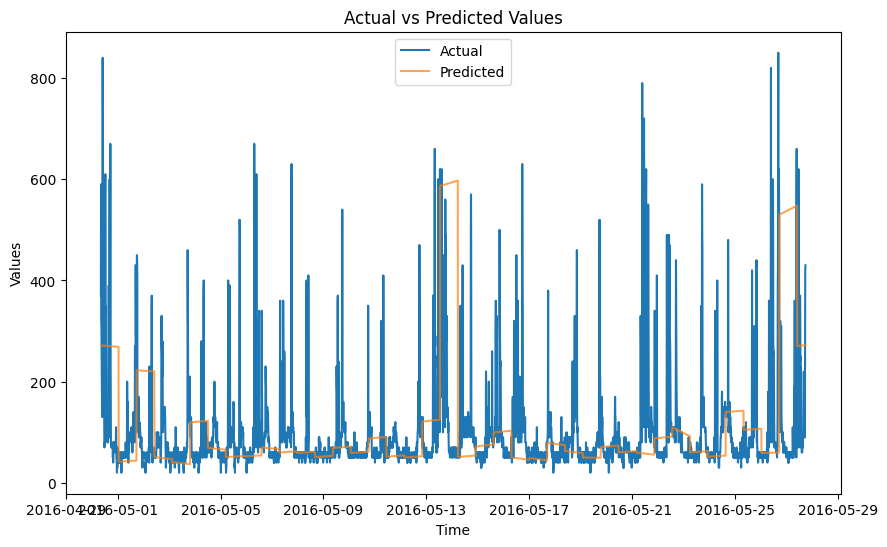

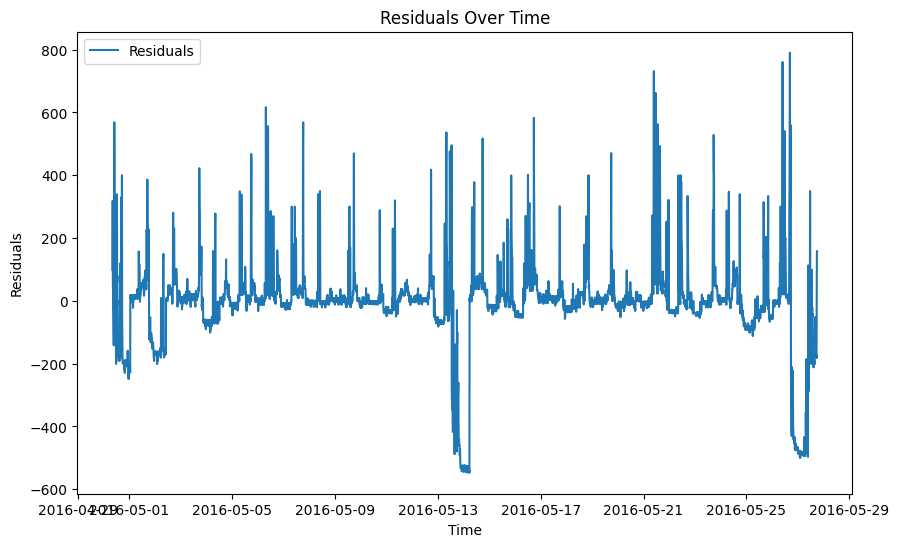

In [13]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actuals.index, actuals, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting the residuals
residuals = actuals.values - predictions.values
plt.figure(figsize=(10, 6))
plt.plot(actuals.index, residuals, label='Residuals')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()